In [ ]:
The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 
2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv. 
you'll get a chance to explore and answer several questions related to this we encourage you then to explore 
further questions that you're interested in!

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and 
top_country.

What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa.

What decade and category pair had the highest proportion of female laureates? Store this as a dictionary 
called max_female_dict where the decade is the key and the category is the value.

Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as 
first_woman_name and first_woman_category.

Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names
in a list named repeat_list.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv('nobel.csv')

nobel.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France



 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America

 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.

 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Linus Carl Pauling']


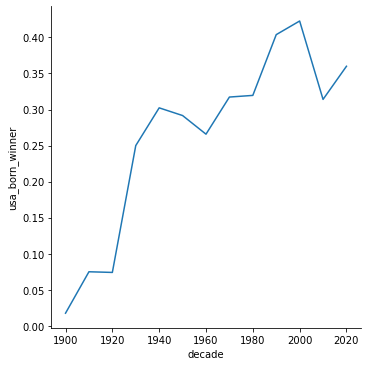

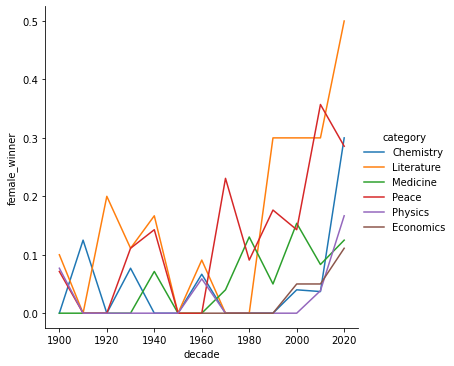

In [4]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Read in the Nobel Prize data
nobel = pd.read_csv('nobel.csv')

# Store and display the most commonly awarded gender and birth country in requested variables
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)

# Calculate the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

# Selecting the laureates that have received 2 or more prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)